In [1]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results
import pandas as pd

c:\Users\florence.boettger\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [3]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_initial2")

In [4]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [5]:
len(study.trials)

405

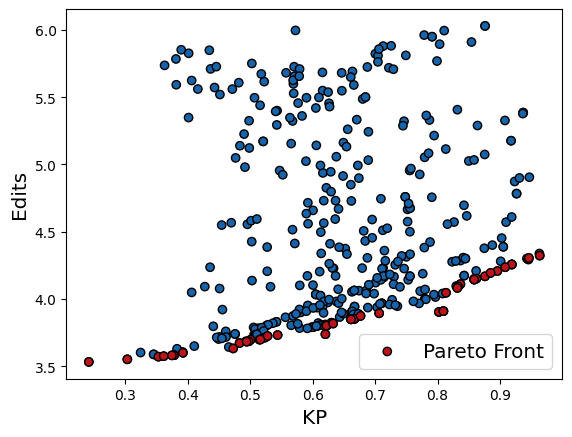

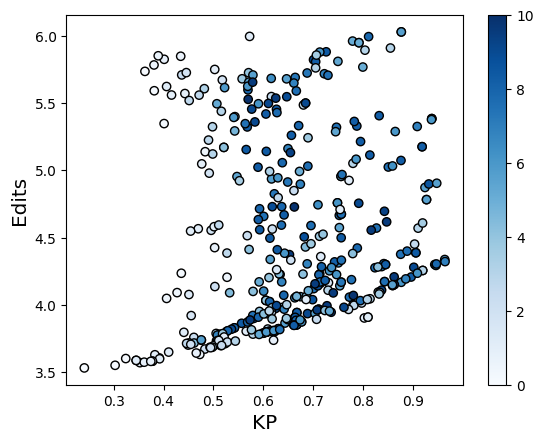

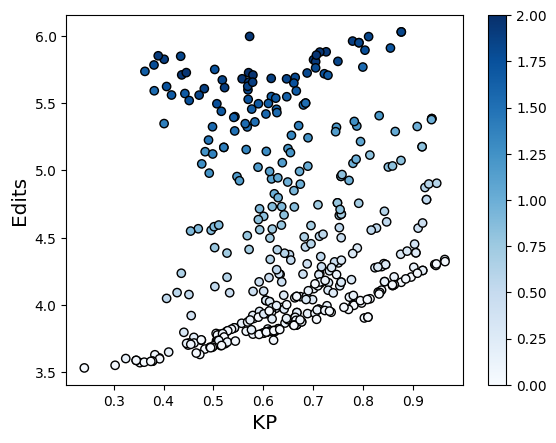

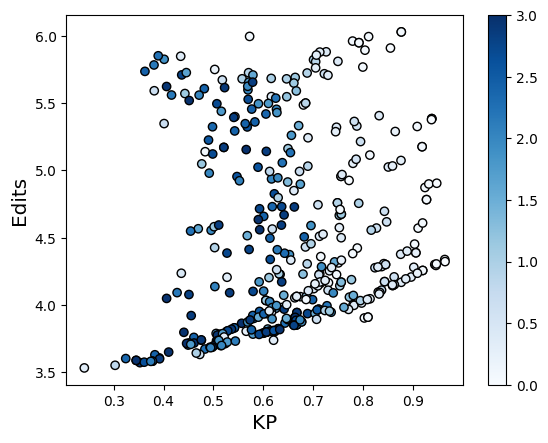

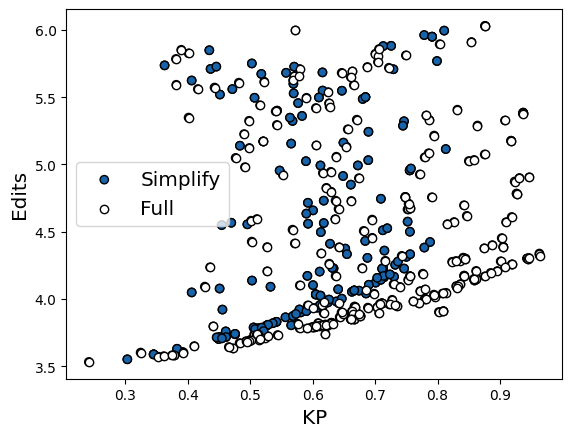

In [6]:
plot_study(study, "initial", print_colorbar=False, label_loc="lower right")
plot_study(study, "initial_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"])
plot_study(study, "initial_lambd", print_pareto=False, map=lambda t: t.params["lambd"])
plot_study(study, "initial_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"])
plot_study(study, "initial_parts_type", print_pareto=False, split_simplify=True, print_colorbar=False, label_loc="center left")

In [7]:
np.average([t.params["max_dist"] for t in study.best_trials])

1.2562956240235825

In [8]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [9]:
hyperparams = ["lambd", "lambd2", "max_dist", "parts_type"]

In [10]:
analyze_spearman(study, hyperparams, "initial")

lambd correlation is: -0.028989567152043177 on KP, 0.906532270970204 on edits.
lambd pvalue is: 0.5617286469104724 on KP, 2.812572521694198e-152 on edits.
lambd2 correlation is: 0.4742357472870793 on KP, 0.19174729807062132 on edits.
lambd2 pvalue is: 5.454338310238214e-24 on KP, 0.00010735241562307507 on edits.
max_dist correlation is: -0.6811111446140459 on KP, -0.35022713045044984 on edits.
max_dist pvalue is: 3.002024522320977e-56 on KP, 4.5042031567304856e-13 on edits.
parts_type correlation is: -0.23622071600399716 on KP, 0.08173126810515716 on edits.
parts_type pvalue is: 1.6234993210919484e-06 on KP, 0.10134049899595807 on edits.


In [11]:
analyze_pearson(study, hyperparams)

lambd correlation is: -0.09585987060878905 on KP, 0.9639020336356552 on edits.
lambd pvalue is: 0.05450189057042505 on KP, 1.4514245595949828e-232 on edits.
lambd2 correlation is: 0.5055349233475509 on KP, 0.12339337307451848 on edits.
lambd2 pvalue is: 1.5648261818592553e-27 on KP, 0.013179178525427498 on edits.
max_dist correlation is: -0.654110115067043 on KP, -0.27040648673590595 on edits.
max_dist pvalue is: 1.4528604150660022e-50 on KP, 3.4962067330815835e-08 on edits.
parts_type correlation is: -0.24163465323954697 on KP, 0.07841496949501663 on edits.
parts_type pvalue is: 9.171014322751334e-07 on KP, 0.11601995798757508 on edits.


In [12]:
results = combine_results("optimize_counterfactuals_initial2")

In [13]:
evaluate_results_spearman(results, "initial")  

avg edits Spearman correlation is 1.00, -0.44, -0.60, 0.01, -0.26
eval single near Spearman correlation is -0.44, 1.00, 0.89, 0.86, 0.91
eval single same Spearman correlation is -0.60, 0.89, 1.00, 0.66, 0.90
eval all near Spearman correlation is 0.01, 0.86, 0.66, 1.00, 0.89
eval all same Spearman correlation is -0.26, 0.91, 0.90, 0.89, 1.00

avg edits Spearman pvalue is 0.000, 0.001, 0.001, 0.773, 0.001
eval single near Spearman pvalue is 0.001, 0.000, 0.001, 0.001, 0.001
eval single same Spearman pvalue is 0.001, 0.001, 0.000, 0.001, 0.001
eval all near Spearman pvalue is 0.773, 0.001, 0.001, 0.000, 0.001
eval all same Spearman pvalue is 0.001, 0.001, 0.001, 0.001, 0.000


In [14]:
evaluate_results_pearson(results)

avg_edits Pearson correlation is 1.0, 0.3345838480341627, 0.4988363410445954, -0.22802332268962744, 0.14063586720113408
eval_single_near Pearson correlation is 0.3345838480341627, 0.9999999999999997, 0.895232843029027, 0.8162266300911863, 0.9114701566053659
eval_single_same Pearson correlation is 0.4988363410445954, 0.895232843029027, 1.0, 0.6079677138629352, 0.9150521303728036
eval_all_near Pearson correlation is -0.22802332268962744, 0.8162266300911863, 0.6079677138629352, 1.0, 0.8525849606097305
eval_all_same Pearson correlation is 0.14063586720113408, 0.9114701566053659, 0.9150521303728036, 0.8525849606097305, 1.0

avg_edits Pearson pvalue is 0.0, 5.363968949446867e-12, 9.62871771069633e-27, 3.7572249962095545e-06, 0.004675992563473549
eval_single_near Pearson pvalue is 5.363968949446867e-12, 0.0, 7.488328853563914e-143, 1.380378220873246e-97, 8.826887794232933e-157
eval_single_same Pearson pvalue is 9.62871771069633e-27, 7.488328853563914e-143, 0.0, 4.305555073521511e-42, 3.241359

In [15]:
evaluate_results_average(results)

avg_edits average is 4.4965822529172215
eval_single_near average is 0.920184593782857
eval_single_same average is 0.7034100964597305
eval_all_near average is 0.8669944934790332
eval_all_same average is 0.6515354920696832


In [16]:
evaluate_results_median(results)

avg_edits median is 4.262752210383133
eval_single_near median is 0.9228066198141011
eval_single_same median is 0.703695307186579
eval_all_near median is 0.8780941595211131
eval_all_same median is 0.6423844483507394
